<a href="https://colab.research.google.com/github/gustavoravel/data_science_portfolio/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

Em dezembro de 2019, o coronavírus COVID-19 foi identificado pela primeira vez na região de Wuhan, na China. Em 11 de março de 2020, a Organização Mundial da Saúde (OMS) classificou o surto de COVID-19 como uma pandemia. Muita coisa aconteceu nos meses intermediários, com grandes surtos no Irã, Coréia do Sul e Itália.

Sabemos que o COVID-19 se espalha por meio de gotículas respiratórias, como tosse, espirro ou fala. Mas com que rapidez o vírus se espalhou pelo Brasil? E podemos ver algum efeito das políticas nacionais, como lockdown e quarentena?

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Felizmente, organizações em todo o mundo têm coletado dados para que os governos possam monitorar e aprender com essa pandemia. Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença, da vacina até o presente momento.

*Observe que as informações e dados relacionados ao COVID-19 são atualizados com frequência. Os dados usados neste projeto foram extraídos em 14 de fevereiro de 2021 e não devem ser considerados os dados mais atualizados disponíveis.*

## Obtenção dos Dados

Muitas fontes monitoram e agregam dados sobre a vacina contra a COVID-19. Elas são atualizadas em momentos distintos e podem coletar dados de várias maneiras. Para essa análise, iremos utilizar o repositório de dados da [OWID](https://ourworldindata.org/) (Our World in Data), que tem dados alimentados por diversos pesquisadores ao redor do mundo.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

### Dicionário de Variáveis
 O próprio diretório de dados informa uma descrição das variáveis. Vamos carregá-los e lê-los:
 

In [ ]:
desc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv')
desc[['column', 'description']]

,column,description
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Continent of the geographical location
2,location,Geographical location
3,date,Date of observation
4,total_cases,Total confirmed cases of COVID-19
5,new_cases,New confirmed cases of COVID-19
6,new_cases_smoothed,New confirmed cases of COVID-19 (7-day smoothed)
7,total_deaths,Total deaths attributed to COVID-19
8,new_deaths,New deaths attributed to COVID-19
9,new_deaths_smoothed,New deaths attributed to COVID-19 (7-day smoot...


Iremos separar apenas os dados do Brasil para análise.

In [ ]:
br = df.loc[df['location'] == "Brazil"].copy()

## Análise Exploratória dos Dados

Nesta análise de dados, iremos verificar e corrigir nosso conjunto de dados, visualizar a evolução dos casos no Brasil e uma intrudução à situação da vacinação.




### Análise Exploratória Inicial

Como separamos nossos dados apenas com informações do Brasil, temos apenas 354 entradas, com as mesmas 56 varíaveis que nossos notórios pesquisadores criaram.

In [ ]:
#general info
br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 8897 to 9252
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               356 non-null    object 
 1   continent                              356 non-null    object 
 2   location                               356 non-null    object 
 3   date                                   356 non-null    object 
 4   total_cases                            356 non-null    float64
 5   new_cases                              356 non-null    float64
 6   new_cases_smoothed                     351 non-null    float64
 7   total_deaths                           336 non-null    float64
 8   new_deaths                             336 non-null    float64
 9   new_deaths_smoothed                    351 non-null    float64
 10  total_cases_per_million                356 non-null    float64
 11  ne

Observe que se selecionarmos apenas as colunas numéricas do nosso conjunto de dados, poderemos extrair informações estatísticas úteis para os casos da COVID-19 no Brasil. Repare que, ao compararmos os dados presesntes com suas colunas "suavizadas" (7-day smoothed), vemos pouca ou nenhum diferença entre eles. Veremos mais detalhes à frente ao entendermos média móvel.

In [ ]:
#satistics info
br.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.560000e+02,356.000000,351.000000,336.000000,336.000000,351.000000,356.000000,356.000000,351.000000,336.000000,336.000000,351.000000,338.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000e+01,16.000000,0.0,82.000000,82.000000,0.0,0.0,3.100000e+01,3.100000e+01,10.000000,30.000000,30.00000,31.000000,31.000000,10.000000,30.000000,335.000000,356.0,3.560000e+02,356.0,3.560000e+02,3.560000e+02,3.560000e+02,3.560000e+02,3.560000e+02,3.560000e+02,3.560000e+02,3.560000e+02,0.0,3.560000e+02,3.560000e+02,3.560000e+02
mean,3.639056e+06,27715.477528,27777.397655,110256.119048,713.610119,675.461960,17120.181854,130.389315,130.680632,518.707301,3.357223,3.177761,1.188462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.181557e+06,14.967813,NaN,52873.378049,0.248756,NaN,NaN,2.186725e+06,2.152932e+06,91279.100000,176465.966667,156358.90000,1.028710,1.012903,0.042000,735.633333,67.264448,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
std,3.084871e+06,20295.043854,16282.038501,74227.604503,416.832226,344.448381,14512.983573,95.479373,76.599978,349.208724,1.961015,1.620469,0.319482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.059308e+06,9.688130,NaN,24083.824628,0.113345,NaN,NaN,1.781189e+06,1.735949e+06,79626.815187,141272.839317,84921.58579,0.838191,0.817138,0.036454,399.503181,15.255708,0.0,4.269257e-14,0.0,1.778857e-14,3.824543e-14,3.460944e-11,4.447142e-16,1.195392e-12,7.115428e-15,6.048114e-14,8.894285e-14,NaN,1.067314e-14,1.992320e-13,7.004249e-15
min,1.000000e+00,0.000000,0.286000,1.000000,0.000000,0.000000,0.005000,0.000000,0.001000,0.005000,0.000000,0.000000,0.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.298500e+04,0.296000,NaN,5345.000000,0.025000,NaN,NaN,0.000000e+00,0.000000e+00,1962.000000,112.000000,112.00000,0.000000,0.000000,0.000000,1.000000,5.560000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
25%,3.719762e+05,10826.250000,17061.928500,38088.000000,399.750000,463.214500,1749.987500,50.933000,80.269000,179.187750,1.880500,2.179000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.962835e+06,9.234750,NaN,33280.250000,0.156750,NaN,NaN,5.712480e+05,5.712480e+05,27670.000000,59514.000000,89761.75000,0.265000,0.265000,0.012500,422.000000,63.430000,212559409.0,2.504000e+01,33.5,8.552000e+00,5.060000e+00,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01
50%,3.557346e+06,25902.000000,29871.571000,121988.500000,691.500000,713.000000,16735.772500,121.857500,140.533000,573.903000,3.253500,3.354000,1.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.997547e+06,14.102000,NaN,56343.500000,0.265000,NaN,NaN,2.074059e+06,2.046523e+06,65707

Ao analisarmos os valores faltantes, vemos que, nessa nossa base de dados, o Brasil ainda não tem informações referentes a instalações para lavar as mãos, detalhes de pacientes em UTI e testes. Como esses dados não vão influenciar em nossa análise (embora seria muito útil ter essas informações) vamos removê-lo do nosso conjunto de dados.

In [ ]:
#missing values
(br.isnull().sum() / br.shape[0]).sort_values(ascending=False)

icu_patients                             1.000000
handwashing_facilities                   1.000000
icu_patients_per_million                 1.000000
hosp_patients                            1.000000
hosp_patients_per_million                1.000000
weekly_icu_admissions                    1.000000
weekly_icu_admissions_per_million        1.000000
weekly_hosp_admissions                   1.000000
weekly_hosp_admissions_per_million       1.000000
new_tests                                1.000000
tests_per_case                           1.000000
positive_rate                            1.000000
new_tests_per_thousand                   1.000000
people_fully_vaccinated                  0.971910
people_fully_vaccinated_per_hundred      0.971910
total_tests                              0.955056
total_tests_per_thousand                 0.955056
new_vaccinations_smoothed_per_million    0.915730
new_vaccinations_smoothed                0.915730
new_vaccinations                         0.915730


In [ ]:
#removing columns with missing values by threshold
threshold = (br.isnull().sum() / br.shape[0]) == 1.0
threshold = br[threshold.index[threshold]]
br = br.drop(threshold, axis=1)

Após removermos nossos valores totalmente nulos, a seguir vamos configurar nosso conjunto de dados para que seu índice seja a data da observação das entradas. Assim conseguiremos ter um melhor panorama de evolução ao longo do tempo da situação no Brasil. 

In [ ]:
#column type conversion and index setting
br['date'] = pd.to_datetime(br['date'])
br.set_index('date', inplace=True)

Agora que limpamos nasso conjunto de dados, vamos ver que nas primeiras entradas os dados começaram a ser coletados em fevereiro de 2020

In [ ]:
#first entries preview
br.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_tests,total_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765


Até Fevereiro de 2021. Temos quase 12 meses completos para fazer uma visualização temporal dos casos no Brasil. Vamos iniciar com as visualizações.

In [ ]:
#last entries preview
br.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_tests,total_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-11,BRA,South America,Brazil,9713909.0,54742.0,45373.714,236201.0,1351.0,1058.000,45699.737,257.537,213.464,1111.223,6.356,4.977,0.99,NaN,NaN,NaN,NaN,NaN,4406835.0,4326075.0,80760.0,286503.0,190540.0,2.07,2.04,0.04,896.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2021-02-12,BRA,South America,Brazil,9765455.0,51546.0,45470.000,237489.0,1288.0,1065.000,45942.238,242.502,213.917,1117.283,6.059,5.010,0.99,NaN,NaN,NaN,NaN,NaN,4696136.0,4586270.0,109866.0,289301.0,231604.0,2.21,2.16,0.05,1090.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2021-02-13,BRA,South America,Brazil,9809754.0,44299.0,51798.429,238532.0,1043.0,1214.000,46150.646,208.408,243.689,1122.190,4.907,5.711,0.98,NaN,NaN,NaN,NaN,NaN,5125206.0,4946738.0,178468.0,429070.0,246260.0,2.41,2.33,0.08,1159.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2021-02-14,BRA,South America,Brazil,9834513.0,24759.0,44267.571,239245.0,713.0,1101.571,46267.126,116.480,208.260,1125.544,3.354,5.182,0.98,NaN,NaN,NaN,NaN,NaN,5236943.0,5042713.0,194230.0,111737.0,240466.0,2.46,2.37,0.09,1131.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2021-02-15,BRA,South America,Brazil,9866710.0,32197.0,48867.143,239773.0,528.0,1177.000,46418.599,151.473,229.899,1128.028,2.484,5.537,NaN,NaN,NaN,NaN,NaN,NaN,5293979.0,5076110.0,217869.0,57036.0,241206.0,2.49,2.39,0.10,1135.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765


### Visualização Gráfica

A simples leitura dos números em uma tabela torna difícil ter uma noção da escala e do crescimento do surto. Vamos desenhar um gráfico de linha para visualizar os casos confirmados em todo o Brasil.

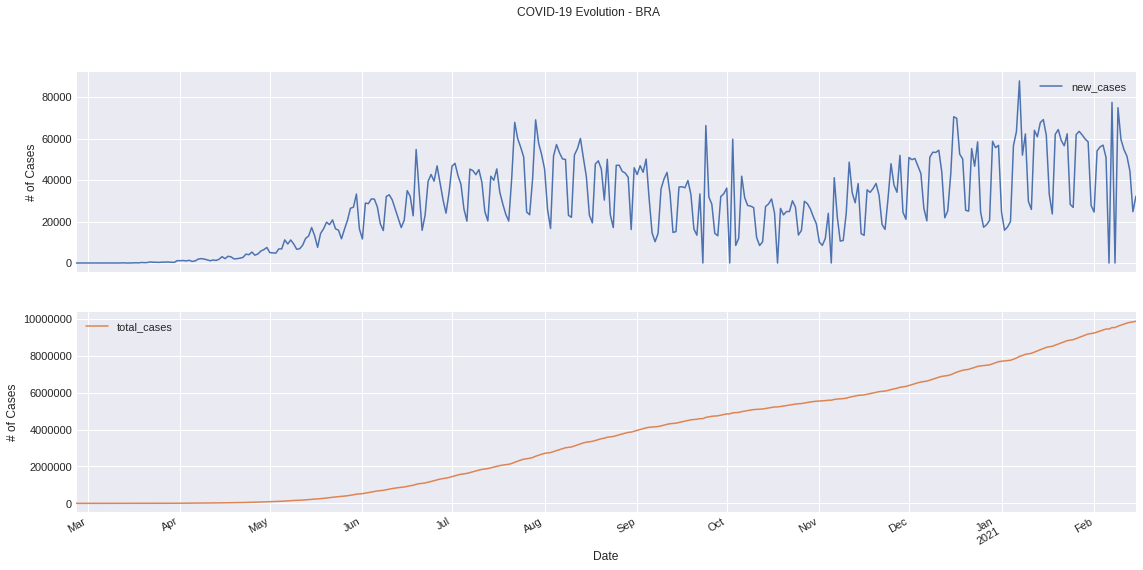

In [ ]:
#plots
#print(plt.style.available)
plt.style.use('seaborn-darkgrid')
ax = br[['new_cases', 'total_cases']].plot(subplots=True, 
                                           figsize=(19,9),
                                           title='COVID-19 Evolution - BRA',
                                           xlabel='Date',
                                           ylabel='# of Cases'
                                           )

#removing sci notation
ax[1].ticklabel_format(axis='y', style='plain')
                                          
plt.show()

Ao analisar o número de novos casos, vemos que em alguns períodos eles descem drasticamente. Se nós formos analisar mais a fundo, eles estão sendo notificados nos fins de semana (sábado e domingo, por exemplo). Mas nós sabemos que o vírus não tira férias e nem descansa aos fins de semana. Isso se dá por conta da falta de computação nesses dias, onde nós não teríamos os profissionais disponíveis para computar os casos. Coisas como subnotificação dos casos, também enganaram dados no Brasil, como podemos ver [aqui](https://youtu.be/CYhIQiLkjhM) 

Vamos também desenhar um gráfico de linha para visualizar os números de mortes confirmados em todo o Brasil.

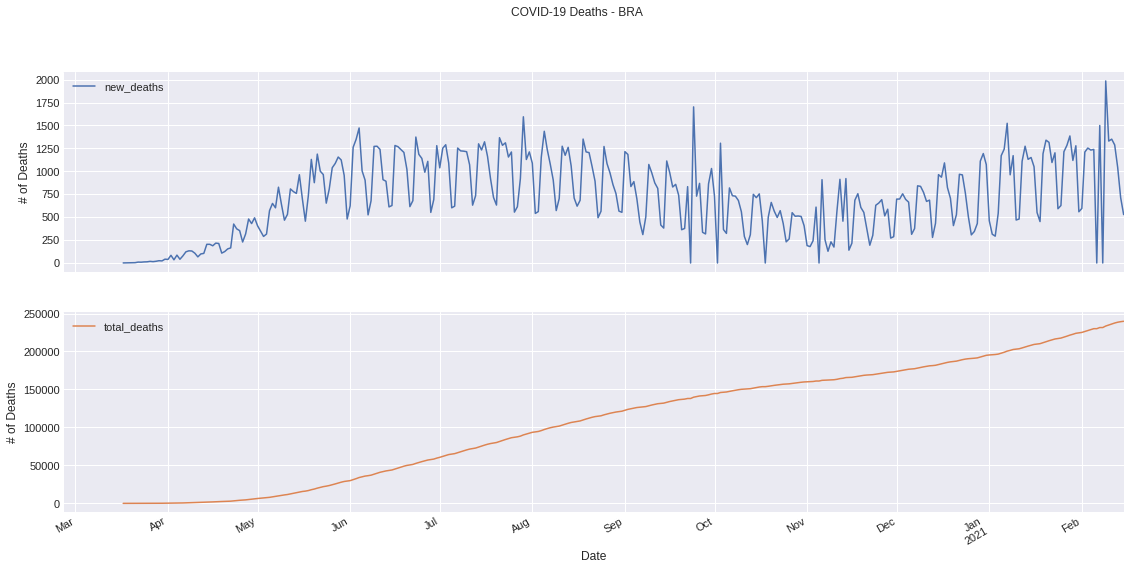

In [ ]:
ax1 = br[['new_deaths', 'total_deaths']].plot(subplots=True, 
                                           figsize=(19,9),
                                           title='COVID-19 Deaths - BRA',
                                           xlabel='Date',
                                           ylabel='# of Deaths'
                                           )

plt.show()

A primeira morte por COVID-19 no Brasil foi registrada em 17/03/2020, 20 dias depois o registro do primeiro caso, em 26/02/2020. Vamos visualizá-lo também, marcado na linha vertical vermelha do gráfico.

In [ ]:
#first death registration
fd = br['new_deaths'] > 0
fd = fd[fd == 1].index[0]
fd

Timestamp('2020-03-17 00:00:00')

In [ ]:
#first case registration
fc = br['new_cases'] > 0
fc = fc[fc == 1].index[0]
fc

Timestamp('2020-02-26 00:00:00')

In [ ]:
delta = fd - fc
delta

Timedelta('20 days 00:00:00')

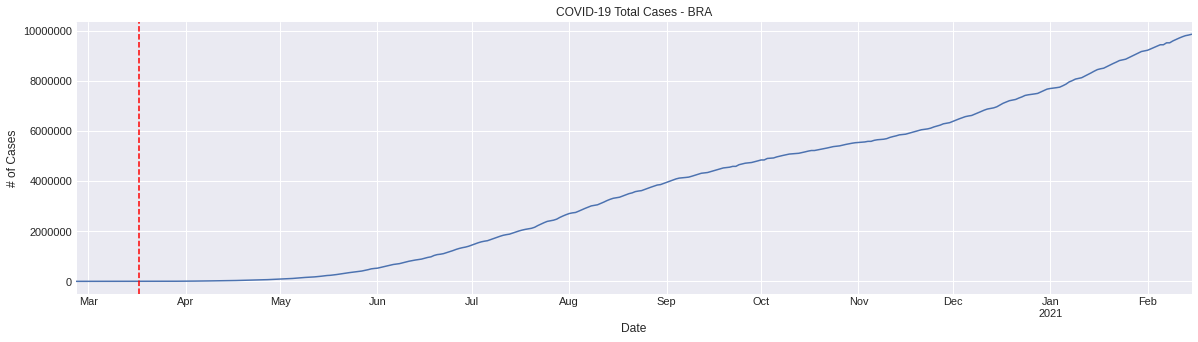

In [ ]:
#plot
ax2 = br['total_cases'].plot(figsize=(20, 5),
                            title='COVID-19 Total Cases - BRA',
                            xlabel='Date',
                            ylabel='# of Cases'
                            )
ax2.axvline(fd, color='red', linestyle='--')
ax2.ticklabel_format(axis='y', style='plain')

plt.show()

#### Média Móvel

Dentro das análises de Séries Temporais a média móvel ou MA (Moving Average, do termo em inglês) servem para suavizar flutuações curtas e destacar tendências de longo prazo, de acordo com sua definição [aqui](https://pt.wikipedia.org/wiki/M%C3%A9dia_m%C3%B3vel). O limiar entre curto e longo prazo depende da aplicação, bem como dos parâmetros da média móvel, como por exemplo, o tamanho da subsequência.

Nesta análise, por exemplo, a nossa subseqência, ou simplesmente sequência, vão ser de uma semana (7 dias), duas semana (14 dias) e um mês (30 dias).

[Aqui](https://g1.globo.com/bemestar/coronavirus/noticia/2020/07/27/entenda-como-e-calculada-a-media-movel-e-a-variacao-dos-casos-e-mortes-por-covid-19.ghtml) podemos entender melhor a importância da média móvel nas análises dos casos de COVID-19. 

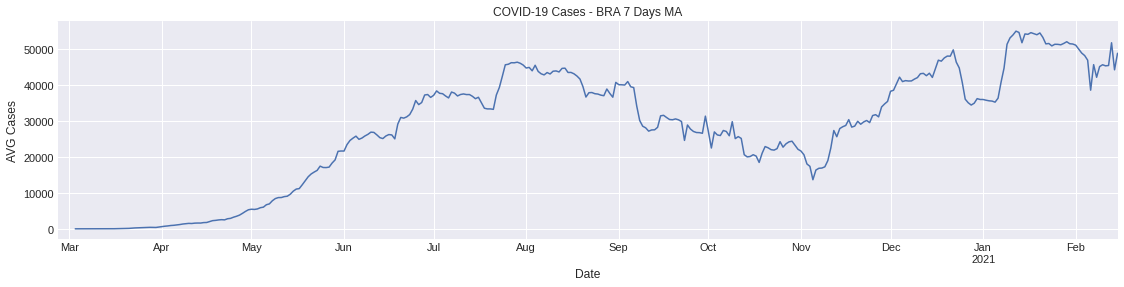

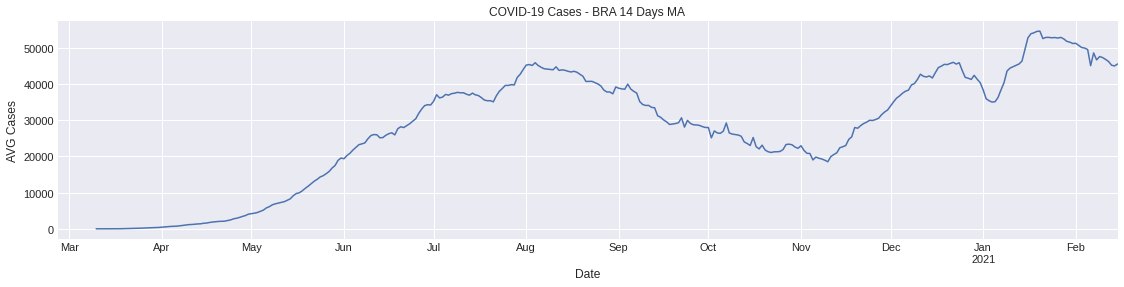

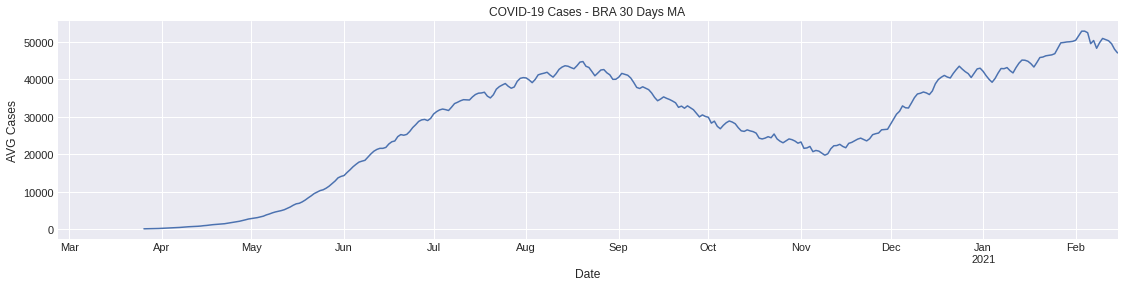

In [ ]:
#new cases daily moving average 
timeframe = [7, 14, 30]
intervs = []

for t in timeframe:
  frame = br['new_cases'].rolling(window=t).mean()
  intervs.append(frame)

for idx, item in enumerate(intervs):
  ax5 = item.plot(figsize=(19, 4), 
                  title='COVID-19 Cases - BRA {} Days MA'.format(timeframe[idx]),
                  xlabel='Date',
                  ylabel='AVG Cases')
  plt.show()

Nos gráficos acima, podemos ver que as médias móveis nos mostram uma **tendência**. Ou seja, os casos **tendem** a aumentar no decorrer do tempo. As ondas formadas pelas linhas são a suavização do número de novos casos. Porém, desde o começo do surto, o número de novos casos mais baixo foi na casa dos 20000 em Novembro, antes de subirem novamente. Vamos agregar os dados mensalmente para termos uma melhor compreensão.

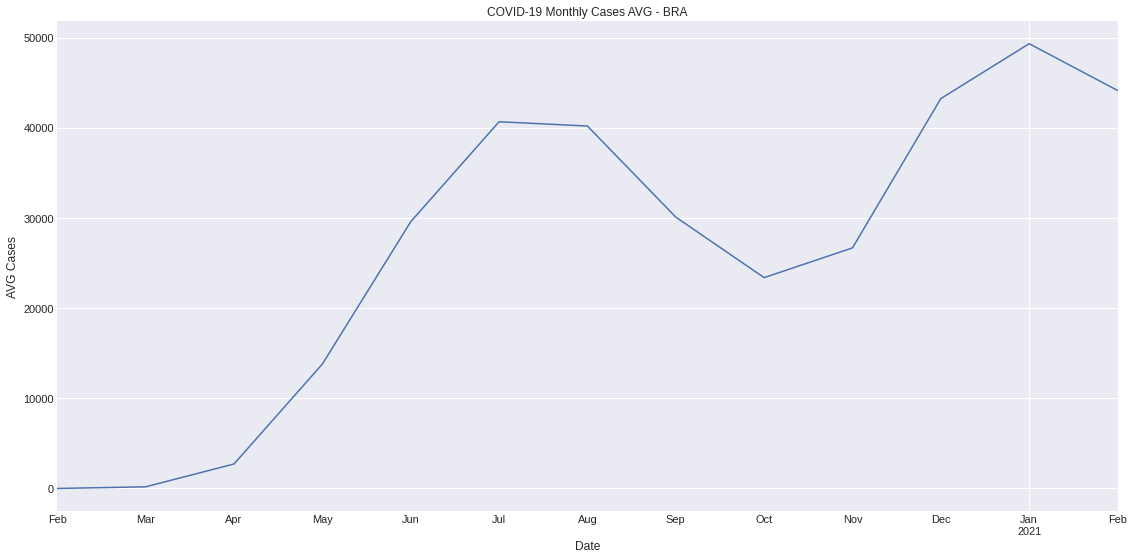

In [ ]:
#agg monthly avg
new_cases_ma = br['new_cases'].resample('M').mean()

ax6 = new_cases_ma.plot(figsize=(19,9),
                        title='COVID-19 Monthly Cases AVG - BRA',
                        xlabel='Date',
                        ylabel='AVG Cases'
                        )

plt.show()

Podemos ver que a média agregada mensalmente possui a mesma forma que a média móvel de 30 dias acima, formando assim uma onda de diminuição e aumento de novos casos, e ainda confirmando que eles tendem a aumentar.  Vamos agora fazer essa mesma análise para o número de novas mortes, onde esperamos ter um resultado relacionado.

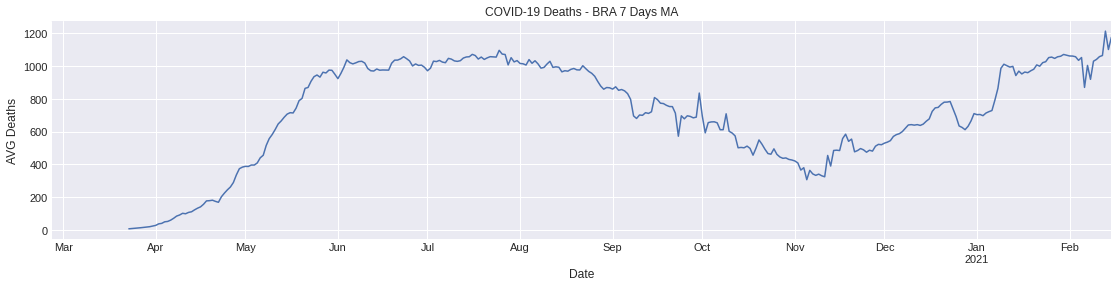

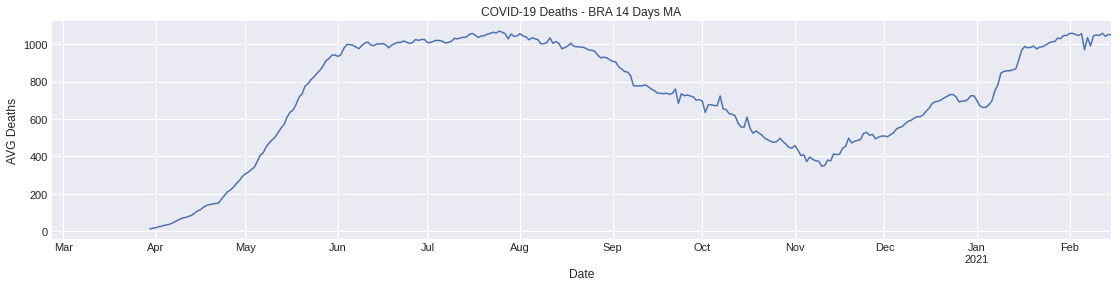

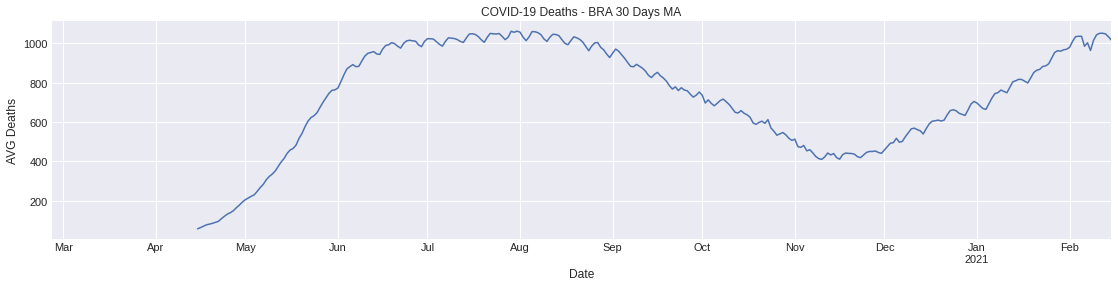

In [ ]:
#new deaths daily moving average 
intervs = []

for t in timeframe:
  frame = br['new_deaths'].rolling(window=t).mean()
  intervs.append(frame)

for idx, item in enumerate(intervs):
  ax7 = item.plot(figsize=(19, 4), 
                  title='COVID-19 Deaths - BRA {} Days MA'.format(timeframe[idx]),
                  xlabel='Date',
                  ylabel='AVG Deaths')
  plt.show()

Logo acima, mesmo com a suavização, ainda temos uma instabilidade tendencial no número de novas mortes. No último trimestre de 2020, vemos uma leve diminuição dos casos com o número de mortes nos meses de outubro e novembro e seu crescimento de volta em dezembro. Talvez isso se dê por conta de início de temporada, onde as pessoas que tinham condições de realizar a quarentena começaram a sair de casa e viajar, lotar praias etc.


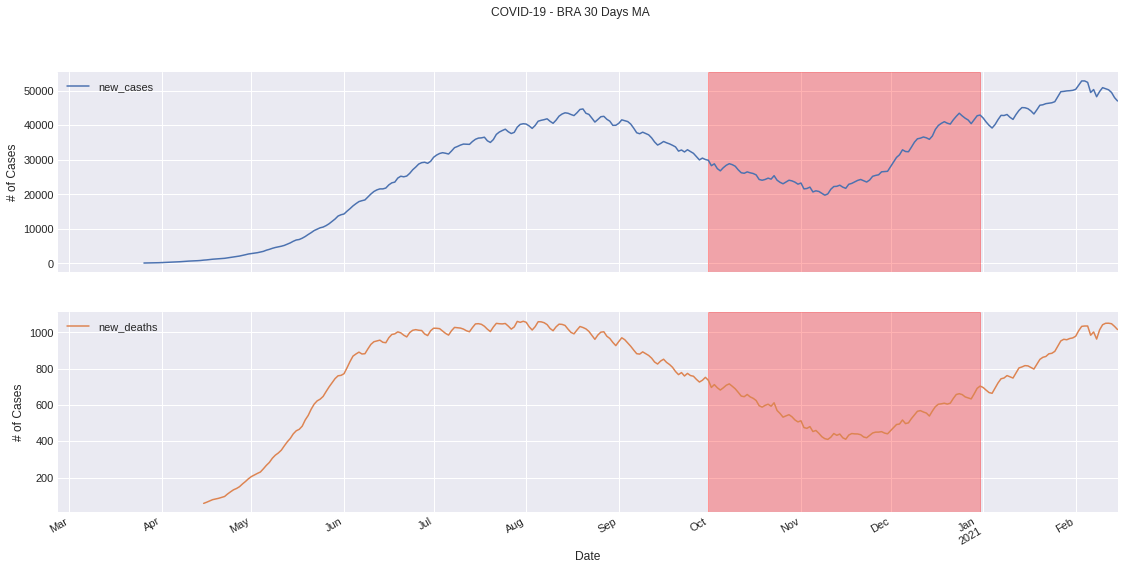

In [ ]:
#2020-Q4 cases and deaths MA

q4cd = br[['new_cases', 'new_deaths']].rolling(window=30).mean()

ax8 = q4cd.plot(subplots=True,
                figsize=(19, 9),
                title='COVID-19 - BRA 30 Days MA',
                xlabel='Date',
                ylabel='# of Cases')

ax8[0].axvspan('2020-10-01', '2020-12-31', color='red', alpha=0.3)
ax8[1].axvspan('2020-10-01', '2020-12-31', color='red', alpha=0.3)

plt.show()

### Vacinação

Não iremos entrar em questões políticas a respeito da vacina. Diferente de outras pandemias como a peste bubônica, do século XIV, a gripe espanhola, em 1918, o avanço da tecnologia e o grande investimento de países desenvolvidos acelerou a produção da vacina para a COVID-19, diferente de outras obrigatórias que temos de tomar na infância e adolescência, como a BCG, Pentavalente, Poliomielite etc. 

Existem três vacinas COVID-19 para as quais certas autoridades reguladoras nacionais autorizaram o uso. No Brasil, estão sendo utilizadas as vacinas Sinovac e Oxford/AstraZeneca. Mais informações você pode encontrar [aqui](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/covid-19-vaccines).

A vacinação começou a ser aplicada no Brasil em 17/01/2021, 326 dias depois da constatação do primeiro caso e 306 dias depois da primeira morte.

In [ ]:
#vaccine data
vc = br['total_vaccinations'] > 0
vc = vc[vc == 1].index[0]
vc

Timestamp('2021-01-17 00:00:00')

In [ ]:
#vacc after first case
delta1 = vc - fc
delta1

Timedelta('326 days 00:00:00')

In [ ]:
#vacc after first death
delta2 = vc - fd
delta2

Timedelta('306 days 00:00:00')

A vacinação no Brasil está sendo feita em 2 fases. No conjunto de dados que obtivemos, a segunda dose começou a ser aplicada em 06/02/2021, quando foi constatada a primeira observação de pessoas totalmente vacinadas. 

O Ministério da Saúde optou por priorizar a vacinação de determinados grupos para garantir o funcionamento dos serviços de saúde, a proteção dos cidadãos com maior risco para coronavírus, além da preservação do funcionamento dos serviços essenciais. Na ordem inicial: Pessoas com 60 anos ou mais institucionalizadas; Pessoas com deficiência institucionalizadas; Povos indígenas vivendo em terras indígenas; Trabalhadores de saúde;

In [ ]:
#fully vaccinated 
fvc = br['people_fully_vaccinated'] > 0
fvc = fvc[fvc == 1].index[0]
fvc

Timestamp('2021-02-06 00:00:00')

In [ ]:
#cols
vac_cols = br.columns[br.columns.str.contains('vaccin')]
vaccination = br.loc[vc:][vac_cols]
vac_cols

Index(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million'],
      dtype='object')

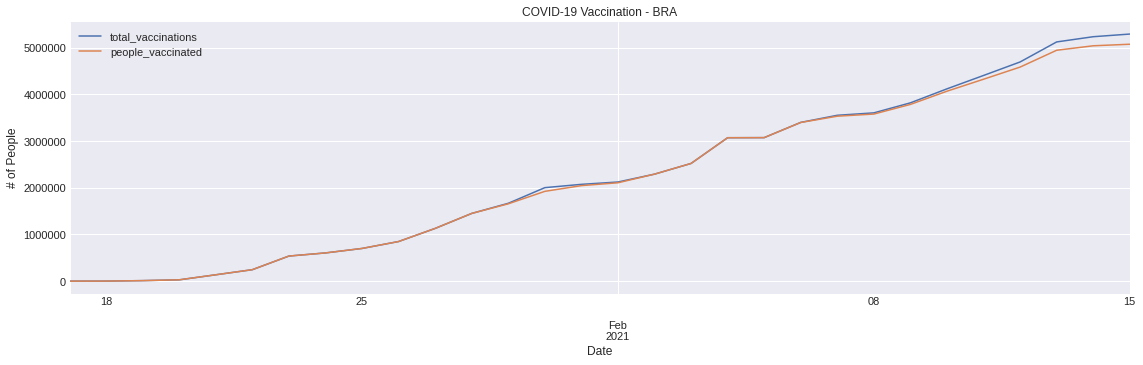

In [ ]:
#plots
ax9 = vaccination[['total_vaccinations', 'people_vaccinated']].plot(figsize=(19,5),
                                                                    title='COVID-19 Vaccination - BRA',
                                                                    xlabel='Date',
                                                                    ylabel='# of People')
ax9.ticklabel_format(axis='y', style='plain')

plt.show()

Logo abaixo temos a visualização do número de pessoas que já tomaram a segunda dose da vacina, uma proporção de 2 a cada 100.

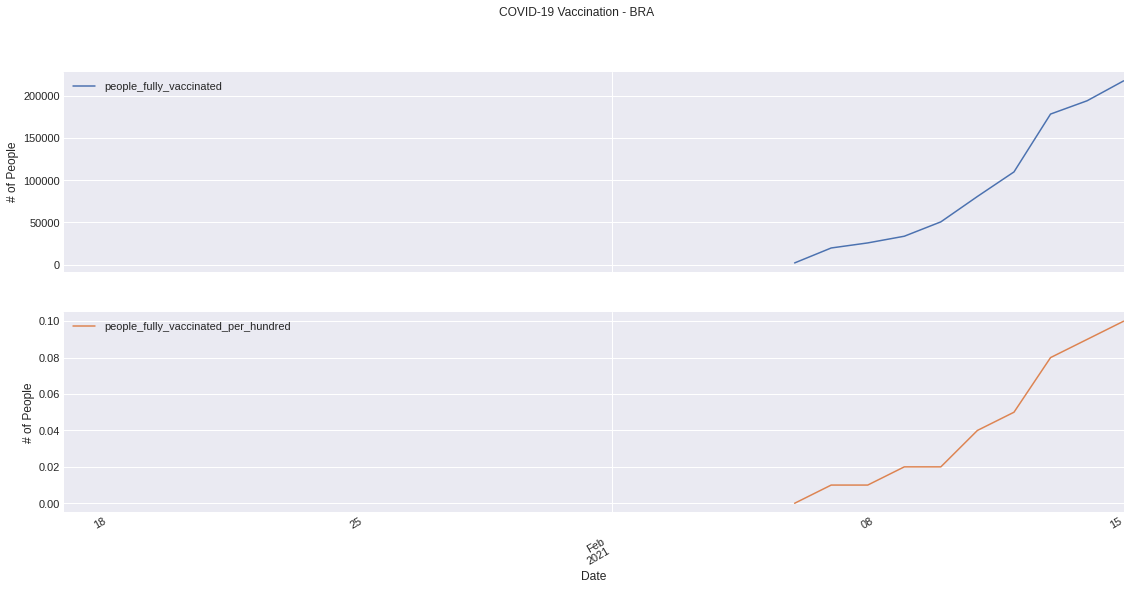

In [ ]:
ax10 = vaccination[['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']].plot(subplots=True,
                                                                                            figsize=(19,9),
                                                                                            title='COVID-19 Vaccination - BRA',
                                                                                            xlabel='Date',
                                                                                            ylabel='# of People')

plt.show()

Embora os números de vacinação sejam relativamente bons (já ultrapassamos a marca de 5M de pessoas do grupo prioritário vacinadas), eles ainda são muito recentes, temos poucos dados para fazer uma comparação com o número de casos, e ver se eles de fato têm a tendência de diminuir.

## Conclusão

Apesar de estarmos tratando de números, pessoas se foram e famílias tiveram suas vidas entristecidas.

Tome as devidas precauções, lave com frequência as mãos até a altura dos punhos, com água e sabão, ou então higienize com álcool em gel 70%. Mantenha distância mínima de 1 (um) metro entre pessoas em lugares públicos e de convívio social. Evite abraços, beijos e apertos de mãos. Adote um comportamento amigável sem contato físico, mas sempre com um sorriso no rosto.

O perigo ainda não passou!

Gustavo Soares via [Deneb AI](https://denebdata.com)